# Analyse statistique de chaînes YouTube

Auteur : [Maximo Rose](https://maximorose.eu/)

Licence : [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

-----------------------------------------------------------

## Introduction

L'ensemble des chaînes requêtées est accessible [ici](https://airtable.com/invite/l?inviteId=invrf5cf7NyHPYtbx&inviteToken=e53814cde13602264f901fb0ab8ceaf74ccab40866a1ff13c004a753931ea913). Elles ont été regroupées par lots pour des raisons techniques (limitation du nombre d'appels quotidiens de l'API YouTube). Vous pourrez aussi voir comment je les ai regroupées : qu'est-ce que les chaînes "culture" ? Quelles sont les chaînes "média" ou qui sont les "artistes" ? etc.

L'ensemble de ces éléments a été récolté entre février et mai 2021.

L'analyse des données portera sur des comparaisons par secteur d'activité pour évaluer la potentialité de la plateforme YouTube à promouvoir le contenu qu'y dépose les institutions culturelles. 

Pour rappel, YouTube n'est pas une simple plateforme de _streaming_. C'est une plateforme de _streaming_ qui collecte les données de ses utilisateurs et monétise leur temps d'attention. La valeur de YouTube pour une administration n'est pas de permettre le dépôt de vidéos sur le web (d'autres sites le permettent de manière bien plus responsables), mais d'offrir de la visibilité parce que YouTube centralise une grosse part du trafic web. 

Dis brièvement : lorsqu'on poste sur une plateforme grand public américaine, c'est pour récolter des vues et du clic. C'est ça l'objectif, sinon autant poster sur [PeerTube](https://joinpeertube.org/) :)



J'ai réparti les chaînes en plusieurs secteurs distincts :
- __Culture__ : Il est principalement constitué de chaînes d'administrations culturelles et de quelques fondations privées, censées poursuivre le même but de transmission d'un patrimoine culturel au grand public.
- __Media__ : Parce que YouTube est une plateforme tout public, lorsqu'une administration poste dessus, son contenu est en concurrence avec celui d'autres organismes dédiés à la médiation : les médias. 
- __YouTubeurs et Youtubeuses :__ Ce sont les professionnels du secteur. Souvent des particuliers qui produisent des contenus vidéos dédiés à la plateforme. Ils sont dédiés dans la mesure même où le YouTubeur démarre, cocnlut et parfois même interromp sa vidéo en demandant de s'abonner ou de liker. Cela montre qu'il a saisi tout l'enjeu de la plateforme, et comment elle fonctionne.
- __Artistes__ : Producteurs culturels additionnels auxquels il faut faire face sur YouTube. Eux aussi communiquent via cette plateforme et entrent donc en jeu dans le classement que fait l'algorithme YouTube lorsqu'il propose à un utilisateur une nouvelle vidéo à regarder (le choix des rappeurs est mon parti pris, car c'est ce que je consomme sur YouTube. Mais on pourrait le faire avec d'autres contenus de même type)


## Rappel des facteurs différenciants pour la promotion de contenus sur YouTube :

En substance, l'algorithme propose: 
- des vidéos en lien avec le sujet recherché par un utilisateur
- des contenus en accord avec l'historique YouTube des utilisateurs, dans leurs goûts ;
- des vidéos de plus en plus populaires à ses utilisateurs pour garantir qu'ils soient toujours tentés de passer plus de temps sur la plateforme (Notre temps, c'est leur argent xD).


In [1]:
# Creation du dataframe sur la base des fichiers .json contenant les statistiques de chaque chaînes
from dataset_mbr import mb_ds
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import datetime


folder = './dataset_with_tags/'

dt = mb_ds()
dt.get_files_dt(folder)

videos, chaines  = dt.get_full_data()

Imported 136 channel data


# Analyse de l'activité des institutions culturelles sur YouTube

Dans les blocs suivants nous allons étudier l'activité des chaînes YouTube créées par des insitutions culturelles, principalement publiques : postent-elles des vidéos ? Si oui, pour quel volume de vues et à quelle fréquence ?

Dans le bloc de code ci-après on va isoler certaines administrations afin de les colorer sur le graphiques en nuage de points qui suivra. 

Après chaque graphique je proposerai un petit bilan analytique des résultats.

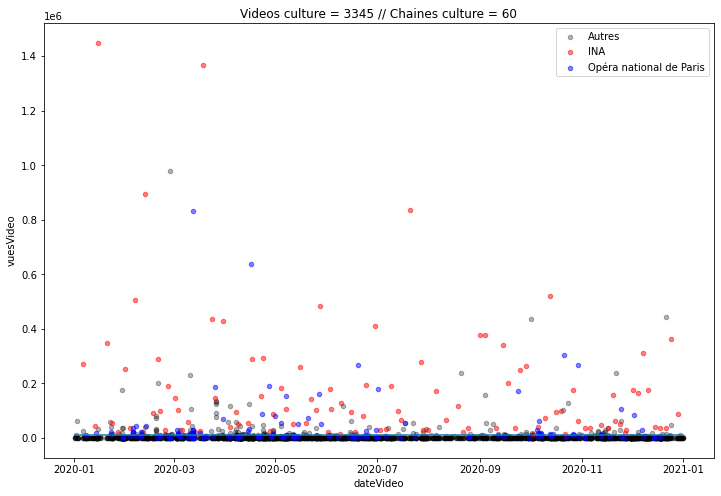

In [9]:
import matplotlib.colors as mcolors
import pandas as pd
import datetime

# Initier le dataSet du Graph
dc = videos[videos['secteur'] == 'culture']
dc = dc[dc['dateVideo'] > datetime.datetime(2019, 12, 31, 23, 59, 59)]
dc = dc[dc['dateVideo'] < datetime.datetime(2020, 12, 31, 23, 59, 59)]

# Juste pour avoir le nombre de chaines
dcc = chaines[chaines['secteur'] == 'culture']

# Isoler l'INA car cas particulier culture
dv_INA = dc[dc['chaine'] == 'INA Société']
dv_noINA = dc[dc['chaine']!= 'INA Société']

# Isoler Opera de Paris
dc_Op = dv_noINA[dv_noINA['chaine'] == 'Opéra national de Paris']
dc_noOPniINA = dv_noINA[dv_noINA['chaine'] != 'Opéra national de Paris']


###############################################################
# Tracer les nuages de points associés à chaque dataframe isolé
###############################################################
fig , axs = plt.subplots(figsize=(12,8))
plt.title('Videos culture = '+ str(dc.shape[0]) +' // Chaines culture = '+ str(dcc.shape[0]))
dc_noOPniINA.plot.scatter(x='dateVideo',y='vuesVideo', ax=axs, color = 'black', alpha = 0.3, label = 'Autres')
# Plotter mes focus
dv_INA.plot.scatter(x='dateVideo',y='vuesVideo', ax = axs, color = 'red', alpha = 0.5, legend = True, label = 'INA')
dc_Op.plot.scatter(x='dateVideo',y='vuesVideo', ax = axs, color = 'blue', alpha = 0.5, legend = True, label = 'Opéra national de Paris')

# Plotter la moyenne
meanV = dc['vuesVideo'].mean()
meanV_L = [meanV]*dc.shape[0]
x_mean = [dc['dateVideo'].min(), dc['dateVideo'].max()]
y_mean = [meanV, meanV]
axs.plot(x_mean, y_mean)

### Moyenne générale & moyenne Top 50

In [3]:
moyenne_vues_culture = y_mean[0]
print('Moyenne des vues culture, date>2020 : '+str(int(moyenne_vues_culture)))
vues_culture_top50 = dc.sort_values(by=['vuesVideo'], ascending=False).head(50)
moyenne_vuesculture_top50 = vues_culture_top50['vuesVideo'].mean()
print('Moyenne top 50 videos culturelles : ', str(int(moyenne_vuesculture_top50)))

Moyenne des vues culture, date>2020 : 10407
Moyenne top 50 videos culturelles :  387769


## Bilan

La moyenne générale de l'ensemble des vidéos postées par des administrations culturelles du dataset en 2020 est de 10 407 vues.

Si on ne considère que le top 50 des vidéos les plus vues, cette moyenne est de 387 769.

Le nuage de point met en évidence que deux institutions s'en sortent mieux que les autres : l'INA et l'Opéra de Paris.

# Analyse de l'activité de Medias, de Youtubeurs et de Youtubeuses

Pour exemple d'autres secteur, on peut étudier l'activité des chaînes média et youtubeurs ou youtubeuses présentes dans le dataset.

<AxesSubplot:title={'center':'Videos media (3633) et Vidéos de Youtubeur et Youtubeuses (805), 2020'}, xlabel='dateVideo', ylabel='vuesVideo'>

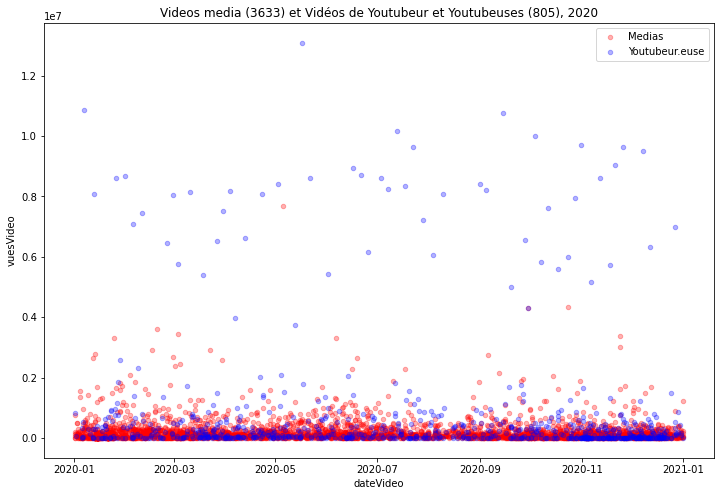

In [4]:
vidz2020 = videos[videos['dateVideo'] > datetime.datetime(2019, 12, 31, 23, 59, 59)]
vidz2020 = vidz2020[vidz2020['dateVideo'] < datetime.datetime(2020, 12, 31, 23, 59, 59)]

# Initier le dataframe pour ce module
dm = vidz2020[vidz2020['secteur'] == 'media']
dy = vidz2020[vidz2020['secteur'] == 'youtubeureuse']

###############################################################
# Tracer les nuages de points associés à chaque dataframe isolé
###############################################################
fig , axs = plt.subplots(figsize=(12,8))
# Titre
plt.title('Videos media ('+ str(dm.shape[0])+') et Vidéos de Youtubeur et Youtubeuses (' + str(dy.shape[0]) + '), 2020')
dm.plot.scatter(x='dateVideo',y='vuesVideo', ax = axs, color = 'red', alpha = 0.3, label = 'Medias')
dy.plot.scatter(x='dateVideo',y='vuesVideo', ax = axs, color = 'blue',  alpha = 0.3, label = 'Youtubeur.euse')

In [5]:
print("Moyenne vues Medias 2020 : " + str(dm['vuesVideo'].mean()))
print("Moyenne vues Youtubeurs et Youtubeuses  2020 : " + str(dy['vuesVideo'].mean()))

Moyenne vues Medias 2020 : 190518.28186072118
Moyenne vues Youtubeurs et Youtubeuses  2020 : 739505.4223602484


## Bilan :

On voit un nuage de points un peu plus aérien que celui du secteur culturel. La moyenne générale des vues des media est presque 20 fois supérieure à celle des institutions culturelles.

Même si les Youtubeurs et Youtubeuses semblent être ceux qui ont postés le moins de vidéos, ils et elles sont ceux qui disposent de la plus grande popularité moyenne.

# Comparaison des secteurs par superpositions des moyennes mensuelles

Afin de mettre en image les conclusions qui précèdent, on va représenter sur l'année le volume moyen des vues de vidéos par secteur d'activité.

Chaque mois, nous allons considérer le top 50 des vues des vidéos postées par les chaînes du secteur. La moyenne de ce top 50 sera la valeur du secteur pour le mois. 

Cela donnera une idée du volume de trafic généré par chaque secteur d'activité, donc de la popularité des contenus associés. 


### Culture VS. Media & Youtubeurs.euses

<AxesSubplot:title={'center':"Moyenne Top 50 nombre de vues du mois pour les videos d'un secteur"}, xlabel='Mois'>

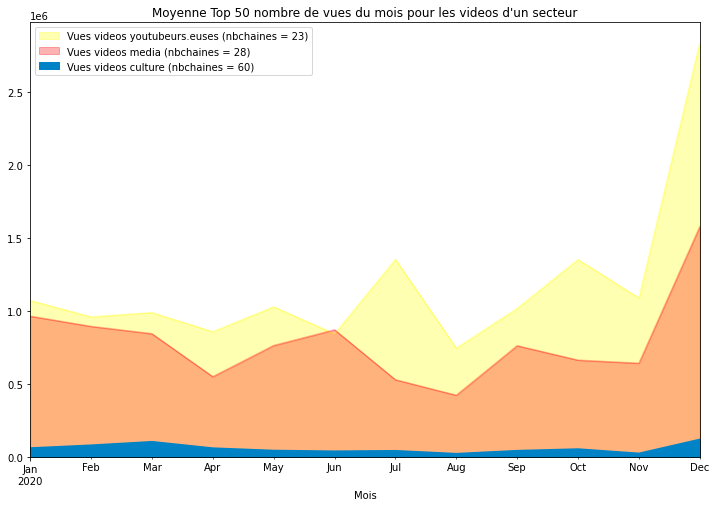

In [6]:
import matplotlib.colors as mcolors
import pandas as pd
import datetime

# On va travailler sur des top 10 pour ne pas etre trop mine par ceux qui font 0
top = 50

# Creation des dataFrame pour nombre de chaines
# Initier le dataframe pour ce module
dcm = chaines[chaines['secteur'] == 'media']
dcy = chaines[chaines['secteur'] == 'youtubeureuse']
dcc = chaines[chaines['secteur'] == 'culture']

x_date = pd.date_range(start=datetime.datetime(2020, 1, 1, 0, 0, 0), end=datetime.datetime(2021, 1, 1, 0, 0, 0), freq='M')

# Creation des dataFrame de courbes lissees en moyennes mensuelles
y_mean_v_y = []
for ind in x_date :
    y_mean = dt.vid_month_meanview(secteur='youtubeureuse', date=ind, top=top)
    y_mean_v_y.append(y_mean)
# Creation d'un dictionnaire temporaire pour pouvoir transformer mes deux series en dataFrame
tmp_d_y = {'Mois' : x_date, 'vuesMoyennes' : y_mean_v_y}
dtf_y = pd.DataFrame(tmp_d_y) 

# Creation des dataFrame de courbes lissees en moyennes mensuelles
y_mean_v_m = []
for ind in x_date :
    y_mean = dt.vid_month_meanview(secteur='media', date=ind, top=top)
    y_mean_v_m.append(y_mean)
# Creation d'un dictionnaire temporaire pour pouvoir transformer mes deux series en dataFrame
tmp_d_m = {'Mois' : x_date, 'vuesMoyennes' : y_mean_v_m}
dtf_m = pd.DataFrame(tmp_d_m)

# Creation des dataFrame de courbes lissees en moyennes mensuelles
y_mean_v_c = []
for ind in x_date :
    y_mean = dt.vid_month_meanview(secteur='culture', date=ind, top=top)
    y_mean_v_c.append(y_mean)
# Creation d'un dictionnaire temporaire pour pouvoir transformer mes deux series en dataFrame
tmp_d_c = {'Mois' : x_date, 'vuesMoyennes' : y_mean_v_c}
dtf_c = pd.DataFrame(tmp_d_c) 

###############################################################
# Tracer les graphs en fonction des moyennes lissées
###############################################################
fig , axs = plt.subplots(figsize=(12,8))
# Titre
plt.title("Moyenne Top " + str(top) + " nombre de vues du mois pour les videos d'un secteur")
dtf_y.plot.area(x='Mois', y='vuesMoyennes', ax = axs, color = 'yellow', alpha = 0.3, label = 'Vues videos youtubeurs.euses (nbchaines = ' + str(dcy.shape[0]) + ')' )
dtf_m.plot.area(x='Mois', y='vuesMoyennes', ax = axs, color = 'red', alpha = 0.3, label = 'Vues videos media (nbchaines = ' + str(dcm.shape[0]) + ')' )
dtf_c.plot.area(x='Mois', y='vuesMoyennes', ax = axs, color = '#0083c6', label = 'Vues videos culture (nbchaines = '+ str(dcc.shape[0]) + ')')

## Bilan : 

Le graphique ci-dessus met en perspective la popularité des contenus culturels institutionnels sur YouTube par rapport à d'autres producteur de médiation : les médias, les YouTubeurs et les YouTubeuses.

En tant que plateforme grand public, YouTube met en concurrence les contenus que postent les administrations avec tous les autres contenus proposés par des professionnels ou des particuliers.

C'est parmi l'ensemble de ces vidéos que l'algorithme YouTube devra choisir celle qui passera ensuite, assurant une vue additionnelle à l'auteur, et un utilisateur maintenu sur la plateforme.

On comprend mieux pourquoi, si je cherche "art contemporain" sur YouTube, la plateforme me retournera plus probablement le contenu d'une chaîne media ou d'un YouTubeur, plutôt que la vidéo postée par un musée.

Exemple : [Imprecran de ma recherche YouTube](https://maximorose.eu/Ressources/art_contemp_sur_YT.png)


Autres producteurs de contenus culturels sur YouTube, les artistes peuvent aussi être intégré à ce graphique pour évaluer le niveaux de visibilité des insitutions sur une plateforme grand public.

### Culture VS. Médias & Youtubeurs.euses VS. Rap Français

<AxesSubplot:title={'center':"Moyenne Top 50 nb vues du mois pour les videos d'un secteur"}, xlabel='Mois'>

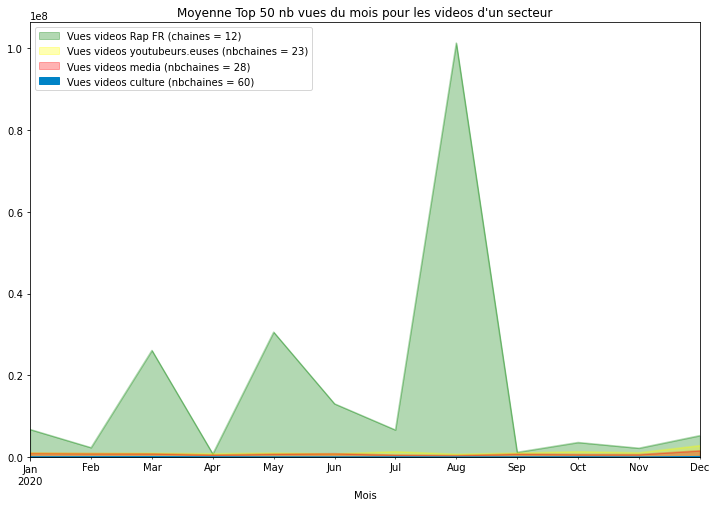

In [7]:
dch = chaines[chaines['secteur'] == 'artiste']

# Creation des dataFrame de courbes lissees en moyennes mensuelles
y_mean_v_ch = []
for ind in x_date :
    y_mean = dt.vid_month_meanview(secteur='artiste', date=ind, top=top)
    y_mean_v_ch.append(y_mean)
# Creation d'un dictionnaire temporaire pour pouvoir transformer mes deux series en dataFrame
tmp_d_ch = {'Mois' : x_date, 'vuesMoyennes' : y_mean_v_ch}
dtf_ch = pd.DataFrame(tmp_d_ch)


###############################################################
# Tracer les graphs en fonction des moyennes lissées
###############################################################
fig , axs = plt.subplots(figsize=(12,8))
plt.title("Moyenne Top " + str(top) + " nb vues du mois pour les videos d'un secteur")
dtf_ch.plot.area(x='Mois', y='vuesMoyennes', ax = axs, color = 'green', alpha = 0.3, label = 'Vues videos Rap FR (chaines = '+ str(dch.shape[0]) + ')')
dtf_y.plot.area(x='Mois', y='vuesMoyennes', ax = axs, color = 'yellow', alpha = 0.3, label = 'Vues videos youtubeurs.euses (nbchaines = ' + str(dcy.shape[0]) + ')' )
dtf_m.plot.area(x='Mois', y='vuesMoyennes', ax = axs, color = 'red', alpha = 0.3, label = 'Vues videos media (nbchaines = ' + str(dcm.shape[0]) + ')' )
dtf_c.plot.area(x='Mois', y='vuesMoyennes', ax = axs, color = '#0083c6', label = 'Vues videos culture (nbchaines = '+ str(dcc.shape[0]) + ')')

#### Moyenne générale et moyenne top 50 pour les chaînes de Rap FR

In [10]:
dvr = videos[videos['secteur'] == 'artiste']
dvr = dvr[dvr['dateVideo'] > datetime.datetime(2019, 12, 31, 23, 59, 59)]
top50 = dvr.sort_values(by=['vuesVideo'], ascending=False).head(50)

print('Moyenne top 50 Rap FR : ' + str(int(top50['vuesVideo'].mean())) )
print('Moyenne générale Rap FR (dateVideo > 2020) : ' + str(int(dvr['vuesVideo'].mean())) )

Moyenne top 50 Rap FR : 19442510
Moyenne générale Rap FR (dateVideo > 2020) : 8084863


## Bilan :

Les contenus postés par les institutions culturelles sont noyés au milieu de contenus bien plus populaires postés par toutes les autres sources d'information sur le web. Les rapports d'échelle sont si démesurés que, sur le dernier graphique, la zone des contenus déposés par les institutions culturelles colle l'axe des abscisses au point de paraître invisible.

Bravo à JuL et à sa _team_ pour ["En bande organisée"](https://www.youtube.com/watch?v=-CVn3-3g_BI) qui a explosé tous les records de vues. C'est surtout ça le pic vert en aout ! 

Il est à noter que ce titre est une collaboration entre plusieurs artistes. Ils ont donc sûrement mis en commun leurs réseaux pour la promotion de leur _single_. C'est la multiplication des sources qui a créé le fleuve. 

# Fréquence de post sur la plateforme

Un enjeu pour être plus facilement référencé par Youtube serait de poster régulièrement. Dans les blocs suivants nous allons donc étudier la fréquence de post moyenne par secteur.

Pour ce faire, chaque mois, on prendra la moyenne du nombre de vidéos postées par les 6 chaînes les plus actives du secteur. Cette moyenne sera la valeur mensuelle du secteur.


<AxesSubplot:title={'center':'Moyenne top 6 frequence de post/chaine sur le mois'}, xlabel='Mois'>

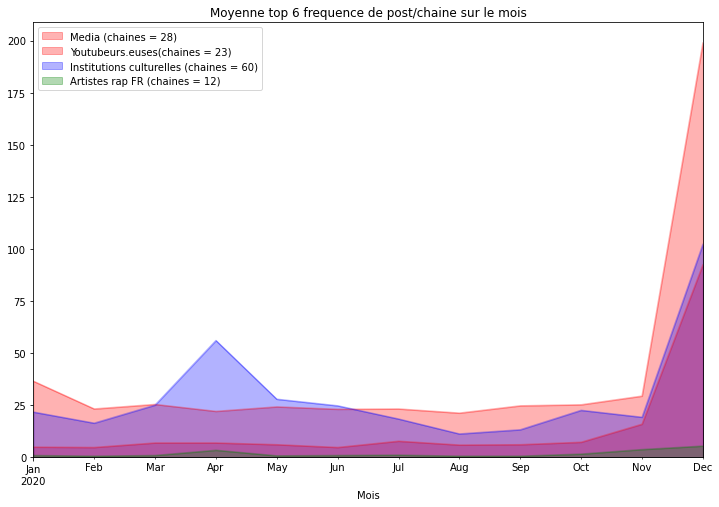

In [10]:
import matplotlib.colors as mcolors
import pandas as pd
import datetime

# On ne travaille qu'avec le top 10 des chaines sur le mois
top = 6

# CREATION AXE ABSCISSE
x_date = pd.date_range(start=datetime.datetime(2020, 1, 1, 0, 0, 0), end=datetime.datetime(2021, 1, 1, 0, 0, 0), freq='M')

# Y CULTURE
y_mean_v_c = []
for ind in x_date :
    y_nbv = dt.vid_secteur_mois(secteur='culture', date=ind)
    y_nbv = y_nbv.sort_values(by=['nbVideos'], ascending=False).head(top)
    y_mean_v_c.append(y_nbv['nbVideos'].mean())
# Creation d'un dictionnaire temporaire pour pouvoir transformer mes deux series en dataFrame
tmp_d_c = {'Mois' : x_date, 'nbVideos' : y_mean_v_c }
dtf_c = pd.DataFrame(tmp_d_c)


# Y MEDIA
y_mean_v_m = []
for ind in x_date :
    y_nbv = dt.vid_secteur_mois(secteur='media', date=ind, wo_struct= 'artiste')
    y_nbv = y_nbv.sort_values(by=['nbVideos'], ascending=False).head(top)
    y_mean_v_m.append(y_nbv['nbVideos'].mean())
# Creation d'un dictionnaire temporaire pour pouvoir transformer mes deux series en dataFrame
tmp_d_m = {'Mois' : x_date, 'nbVideos' : y_mean_v_m }
dtf_m = pd.DataFrame(tmp_d_m)


# Y YOUTUBEURS et YOUTUBEUSES
y_mean_v_y = []
for ind in x_date :
    y_nbv = dt.vid_secteur_mois(secteur='youtubeureuse', date=ind, wo_struct= 'artiste')
    y_nbv = y_nbv.sort_values(by=['nbVideos'], ascending=False).head(top)
    y_mean_v_y.append(y_nbv['nbVideos'].mean())
# Creation d'un dictionnaire temporaire pour pouvoir transformer mes deux series en dataFrame
tmp_d_y = {'Mois' : x_date, 'nbVideos' : y_mean_v_y }
dtf_y = pd.DataFrame(tmp_d_y)


# Y CHANTEURS
y_mean_v_ch = []
for ind in x_date :
    y_nbv = dt.vid_secteur_mois(secteur='artiste', date=ind)
    y_nbv = y_nbv.sort_values(by=['nbVideos'], ascending=False).head(top)
    y_mean_v_ch.append(y_nbv['nbVideos'].mean())
# Creation d'un dictionnaire temporaire pour pouvoir transformer mes deux series en dataFrame
tmp_d_ch = {'Mois' : x_date, 'nbVideos' : y_mean_v_ch }
dtf_ch = pd.DataFrame(tmp_d_ch)


##################################################################
# Tracer les graphs en fonction des moyennes de fréquence lissées
##################################################################
fig , axs = plt.subplots(figsize=(12,8))
# Titre
plt.title('Moyenne top 6 frequence de post/chaine sur le mois')
dtf_m.plot.area(x='Mois', y='nbVideos', ax = axs, color = 'red', alpha = 0.3, label = 'Media (chaines = '+ str(dcm.shape[0]) + ')')
dtf_y.plot.area(x='Mois', y='nbVideos', ax = axs, color = 'red', alpha = 0.3, label = 'Youtubeurs.euses(chaines = '+ str(dcy.shape[0]) + ')')
dtf_c.plot.area(x='Mois', y='nbVideos', ax = axs, color = 'blue', alpha = 0.3, label = 'Institutions culturelles (chaines = '+ str(dcc.shape[0]) + ')')
dtf_ch.plot.area(x='Mois', y='nbVideos', ax = axs, color = 'green', alpha = 0.3, label = 'Artistes rap FR (chaines = '+ str(dch.shape[0]) + ')')


## Bilan :

Les administrations culturelles sont plutôt actives sur YouTube. En Avril 2020, elles ont même plus posté que les entités dont c'est le métier : les médias et les YouTubeurs.euses.

Le modèle intéressant est celui des artistes de Rap. Finalement, ils (ou elles) ne postent que lorsqu'ils publient un nouveau clip, c'est à dire une à deux fois par semestre. Cependant, lorsque ça se produit, ils communiquent sur tous les réseaux au préalable. Ils s'assurent aussi que les médias spécialisés proposent un lien vers leur vidéo. Trois fois par an, ils ou elles créent donc un événement qui va pousser un énorme volume de vues sur YouTube (PNL a notamment mis en place des comptes à rebours sur Instagram avant la publication de ses clips sur YouTube). Ce volume initial de vues assurera la popularité de la vidéo, qui sera alors promue par YouTube comme contenu _trending_.

Ils incarnent finalement un modèle de communication très spécifique, qui ne nécessite pas de poster beaucoup pour être populaire.

On pourrait tenter de comparer les volumes de vues des vidéos en fonction de la fréquence de posts sur une période pour voir s'il est utile de poster beaucoup pour être vu.

### Superposons fréquence de post et popularité des contenus pour le secteur culturel

Ceci nous permettra d'établir la nécessiter d'une activité régulière ou non sur YouTube pour y être visible.

Sur le graph suivant, vous verrez :
- En trait plein, le nombre de vues moyen des top (50) vidéos du mois pour le secteur culturel
- En tirets, le nombre de posts moyen des chaînes les plus actives du secteur sur le mois

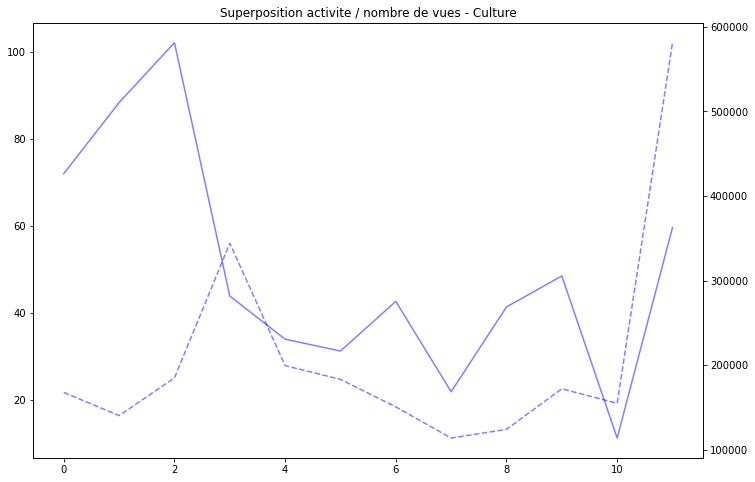

In [12]:
import matplotlib.colors as mcolors
import pandas as pd
import datetime
import matplotlib.pylab as pyplot

# On ne travaille qu'avec le top 10 des chaines sur le mois
toppost = 6

# CREATION AXE ABSCISSE
x_date = pd.date_range(start=datetime.datetime(2020, 1, 1, 0, 0, 0), end=datetime.datetime(2021, 1, 1, 0, 0, 0), freq='M')


# VOLUMES POSTS CULTURE
y_mean_v_cpost = []
for ind in x_date :
    y_nbv = dt.vid_secteur_mois(secteur='culture', date=ind)
    y_nbv = y_nbv.sort_values(by=['nbVideos'], ascending=False).head(top)
    y_mean_v_cpost.append(y_nbv['nbVideos'].mean())
# Creation d'un dictionnaire temporaire pour pouvoir transformer mes deux series en dataFrame
tmp_d_cposts = {'Mois' : x_date, 'nbVideos' : y_mean_v_cpost }
dtf_cposts = pd.DataFrame(tmp_d_cposts)


# VOLUMES VUES CULTURE
y_mean_v_cvues = []
for ind in x_date :
    y_mean = dt.vid_month_meanview(secteur='culture', date=ind, top=top)
    y_mean_v_cvues.append(y_mean)
# Creation d'un dictionnaire temporaire pour pouvoir transformer mes deux series en dataFrame
tmp_d_cvues = {'Mois' : x_date, 'vuesMoyennes' : y_mean_v_cvues}
dtf_cvues = pd.DataFrame(tmp_d_cvues) 

############################################################################
# Tracer les courbes de visibilité et de fréquence de post sur un seul graph
############################################################################
fig , axs = plt.subplots(figsize=(12,8))
pyplot.title('Superposition activite / nombre de vues - Culture')
pl = pyplot.plot(dtf_cposts['nbVideos'], color = 'blue', alpha = 0.5, linestyle='dashed')
ax2 = pyplot.gca().twinx()
pl2 = ax2.plot(dtf_cvues['vuesMoyennes'], color = 'blue', alpha = 0.5)

## Bilan :

Comme les rappeurs et rappeuses semblent l'avoir compris, il n'est pas nécessaire de trop poster pour assurer de la visibilité sur YouTube. Mieux vaut avoir un contenu adapté ou inciter beaucoup de monde à aller voir notre vidéo, pour assurer ensuite que YouTube la mette en valeur.

On pourrait, pour la démonstration, faire le même type de graphique pour un autre secteur, comme les Médias et les Youtubeurs.

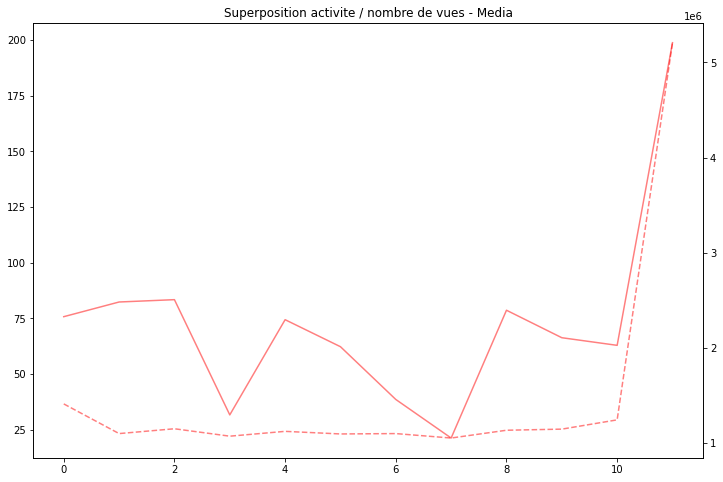

In [13]:
import matplotlib.colors as mcolors
import pandas as pd
import datetime
import matplotlib.pylab as pyplot

# On ne travaille qu'avec le top 10 des chaines sur le mois
toppost = 6

# CREATION AXE ABSCISSE
x_date = pd.date_range(start=datetime.datetime(2020, 1, 1, 0, 0, 0), end=datetime.datetime(2021, 1, 1, 0, 0, 0), freq='M')


# VOLUMES POSTS MEDIA et YT
y_mean_v_mpost = []
for ind in x_date :
    y_nbv = dt.vid_secteur_mois(secteur='media', date=ind, wo_struct='artiste')
    y_nbv = y_nbv.sort_values(by=['nbVideos'], ascending=False).head(top)
    y_mean_v_mpost.append(y_nbv['nbVideos'].mean())
# Creation d'un dictionnaire temporaire pour pouvoir transformer mes deux series en dataFrame
tmp_d_mposts = {'Mois' : x_date, 'nbVideos' : y_mean_v_mpost }
dtf_mposts = pd.DataFrame(tmp_d_mposts)


# VOLUMES VUES MEDIA et YT
y_mean_v_mvues = []
for ind in x_date :
    y_mean = dt.vid_month_meanview(secteur='media', date=ind, wo_struct='artiste', top=top)
    y_mean_v_mvues.append(y_mean)
# Creation d'un dictionnaire temporaire pour pouvoir transformer mes deux series en dataFrame
tmp_d_mvues = {'Mois' : x_date, 'vuesMoyennes' : y_mean_v_mvues}
dtf_mvues = pd.DataFrame(tmp_d_mvues) 

############################################################################
# Tracer les courbes de visibilité et de fréquence de post sur un seul graph
############################################################################
fig , axs = plt.subplots(figsize=(12,8))
pyplot.title('Superposition activite / nombre de vues - Media')
pl = pyplot.plot(dtf_mposts['nbVideos'], color = 'red', alpha = 0.5, linestyle='dashed')
ax2 = pyplot.gca().twinx()
pl2 = ax2.plot(dtf_mvues['vuesMoyennes'], color = 'red', alpha = 0.5)

On aurait pu s'en douter, il ne suffit pas de poster pour être regardé, il faut aussi réussir à se rendre visible.

# Taux d'engagement des vidéos par secteur

Autre facteur important pour voir son contenu promu sur YouTube : avoir un contenu engageant. C'est-à-dire un contenu qui fait réagir l'audience, soit avec un _like_, soit avec un _dislike_.

Dans les blocs suivant nous étudierons la quantité de _likes_ en fonction du nombre de vues des vidéos, par secteur.

Nous prendrons le top 6 des meilleurs taux d'engagement pour des vidéos de plus de 5000 vues par secteur. Et nous en ferons la moyenne pour associer une valeur au secteur.

(Une vidéo avec 3 vues et 2 likes fausserait évidemment nos statistiques)

<BarContainer object of 4 artists>

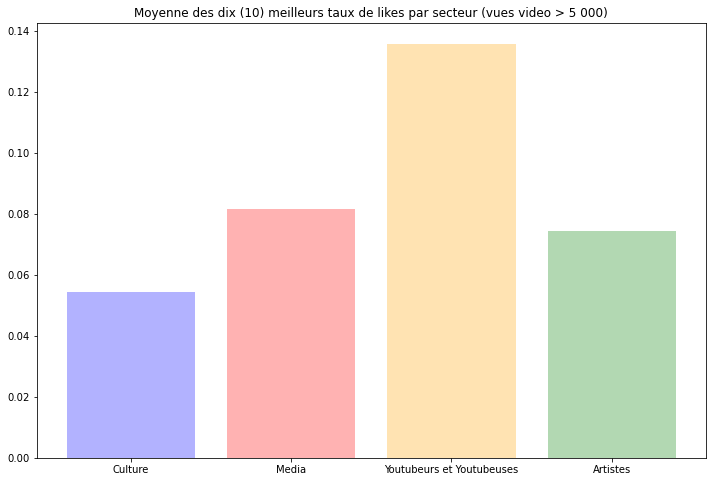

In [16]:
import matplotlib.colors as mcolors
import pandas as pd
import datetime

# On ne travaille qu'avec le top 10 des chaines sur le mois
top = 6
datemin = datetime.datetime(2019, 12, 31, 23, 59, 59)
datemax = datetime.datetime(2021, 1, 1, 0, 0, 0)
minVues = 5000

# Initi DF
dv = dt.get_df_video_tauxlike()
dv = dv[dv['vuesVideo'] > 5000]
dv = dv[dv['dateVideo'] > datemin]
dv = dv[dv['dateVideo'] < datemax]
# Culture
dvlcul = dv[dv['secteur'] == 'culture']
# Media & Youtubeur
dvlmed = dv[dv['secteur'] == 'media']
# Youtubeurs et Youtubeuses
dvlyou = dv[dv['secteur'] == 'youtubeureuse']
# Chanteur
dvlch = dv[dv['secteur'] == 'artiste']

# Recuperation des top pour mean
# Top reaction culture
top_dcl = dvlcul.sort_values(by=['tauxlikes'], ascending=False).head(top)
meanC = top_dcl['tauxlikes'].mean()
# Top reaction media & YT
top_dml = dvlmed.sort_values(by=['tauxlikes'], ascending=False).head(top)
meanM = top_dml['tauxlikes'].mean()
# Top reaction Chanteurs
top_dch = dvlch.sort_values(by=['tauxlikes'], ascending=False).head(top)
meanCH = top_dch['tauxlikes'].mean()
# Top reaction Chanteurs
top_dyou = dvlyou.sort_values(by=['tauxlikes'], ascending=False).head(top)
meanY = top_dyou['tauxlikes'].mean()


############################################################################
# Creation du graphique
############################################################################
# CREATION AXE ABSCISSE
x_cat = ['Culture', 'Media', 'Youtubeurs et Youtubeuses', 'Artistes']
# CREATION VALEURS
y_val = [meanC, meanM, meanY, meanCH]
colors =  ['blue', 'red', 'orange', 'green']
# Declaration des graphs
fig , axs = plt.subplots(figsize=(12,8))
# Titre
plt.title('Moyenne des dix (10) meilleurs taux de likes par secteur (vues video > 5 000)')
axs.bar(x_cat, y_val, color = colors, alpha=0.3)

## Bilan :

Les vidéos les plus engageantes de la cultures sont jusqu'à trois fois moins engageantes que les vidéos des Youtubeurs etYoutubeuses. Ce qui s'explique notamment par le fait que ces derniers produisent du contenu dédié : ils et elles n'hésitent pas à démarrer, conclure, parfois interrompre, leur discours pour dire "Likez ou abonnez-vous, nous en avons besoin".

Si on peut supposer que le taux d'engagement des vidéos culture s'approche de celui des artistes de Rap, la comparaison en volume ramène à la réalité de la visibilité.

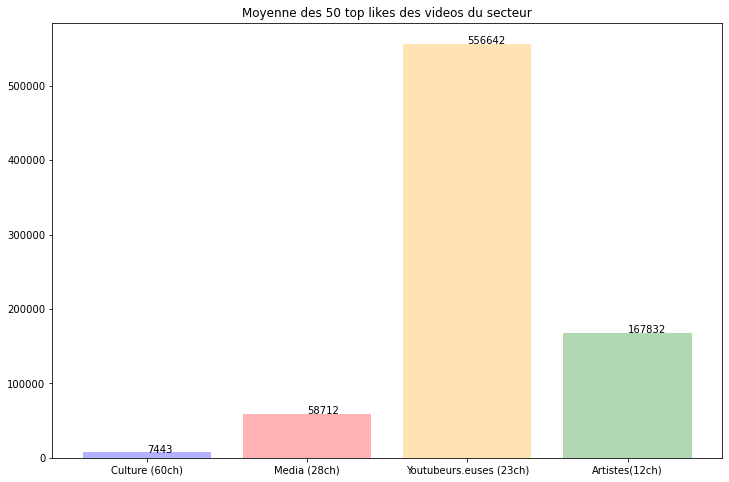

In [19]:
dccu = chaines[chaines['secteur'] == 'culture']
dcme = chaines[chaines['secteur'] == 'media']
dcyo = chaines[chaines['secteur'] == 'youtubeureuse']
dcch = chaines[chaines['secteur'] == 'artiste']

# CULTURE
dvlcul = dvlcul.sort_values(by=['likesVideo'], ascending=False)
topcul = dvlcul.head(50)
meanLikes_c = topcul['likesVideo'].mean()

# MEDIA
dvlmed = dvlmed.sort_values(by=['likesVideo'], ascending=False)
topmed = dvlmed.head(50)
meanLikes_m = topmed['likesVideo'].mean()

# YOUTUBEURS et YOUTUBEUSES
dvlyou = dvlyou.sort_values(by=['likesVideo'], ascending=False)
topyou = dvlyou.head(50)
meanLikes_y = topyou['likesVideo'].mean()

# CHANTEURS
dvlch = dvlch.sort_values(by=['likesVideo'], ascending=False)
topch = dvlch.head(50)
meanLikes_ch = topch['likesVideo'].mean()



############################################################################
# Creation du graphique
############################################################################
# CREATION AXE ABSCISSE
x_cat = ['Culture ('+ str(dccu.shape[0])+'ch)', 'Media ('+ str(dcme.shape[0])+'ch)', 'Youtubeurs.euses ('+ str(dcyo.shape[0])+'ch)', 'Artistes('+ str(dcch.shape[0])+'ch)']
# CREATION VALEURS
y_val = [meanLikes_c, meanLikes_m, meanLikes_y, meanLikes_ch]
colors =  ['blue', 'red', 'orange', 'green']
# Declaration des graphs
fig , axs = plt.subplots(figsize=(12,8))
plt.title('Moyenne des 50 top likes des videos du secteur')
axs.bar(x_cat, y_val, color = colors, alpha=0.3)
xlocs, xlabs = plt.xticks()
xlocs=[i for i in range(0,4)]
xlabs=x_cat
plt.xticks(xlocs, xlabs)
for i, v in enumerate(y_val):
    txt = str(int(v))
    plt.text(xlocs[i], v-0.1, txt)

plt.show()

Les volumes de vues étant si grands pour les artistes de Rap FR, que même un taux d'engagement de 7%, entraîne d'énormes volumes de likes.

Les professionnels de la plateformes produisent les contenus les plus engageants.

# Conclusion

Aujourd'hui les administrations françaises ne peuvent pas (ou peu) bénéficier de la plus-value de YouTube, à savoir la garantie que notre contenu profitera d'une visibilité additionnelle car propulsé dans les vidéos "à suivre" d'un utilisateur YouTube.

Aujourd'hui, pour que le contenu des administrations culturelles apparaissent dans les propositions d'un utilisateur, il est nécessaire que ce dernier soit, soit déjà abonné à la chaîne de l'administration, soit qu'il ait exprimé des intérêts pour des contenus similaires. Les plateformes comme YouTube favorisent une forme d'entre-soi.

Pour exemple :
- [ici](https://maximorose.eu/Ressources/Screeshot_TT_LouiseBourgeois), les propositions faites à l'un de mes amis qui aime la musique et le prototypage de sites web
- [là](https://maximorose.eu/Ressources/Screenshot_20210417_183244_com.google.android.youtube.jpg), les propositions faites à un ami qui aime des vidéos d'actualités
- enfin, [ici](https://maximorose.eu/Ressources/MesPropositions_CentrePompidou.png), les propositions qui me sont faites, sachant que je passe en ce moment mon temps sur des chaînes d'institutions pour faire cette étude xD.

La stratégie de communication des insitutions culturelles sur le web devrait être précisées pour : 
1. Garantir que les contenus postés sur les plateformes grands publics sont des contenus pensés pour profiter de la visibilité que peuvent apporter ces environnements : tags appropriés, _call to action_ embarqué dans la vidéo, invitation orale au like ou à l'abonnement, etc.
1. Tous les autres contenus des administrations, c'est-à-dire les vidéos qui ne sont pas directement pensées pour la plateformes, devraient être postés sur des sites plus respectueux des utilisateurs, c'est-à-dire qui n'imposent pas la collecte de données personnelles et la diffusion de publicités pour la Nutella, et en accord avec les principes de l'Etat : éco-conception, protection des données personnelles, _open source_, etc.

__N.B :__ Il existe des moyens d'être visible sur YouTube sans même poster de contenus sur la plateforme !

Si vous êtes une administration et que vous souhaitez de l'aide pour mettre en place ce type de stratégie de communication, [écrivez-moi !](https://maximorose.eu/about/)
